In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

https://keras.io/examples/vision/captcha_ocr/

In [2]:
# Path to the data directory
data_dir = Path("D:/projects/Final Year Project/Captcha_Crack/dataset")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
labels = [img.split(os.path.sep)[-1].split(".png")[0] for img in images]
characters = set(char for label in labels for char in label)

print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width = 200
img_height = 50

# Factor by which the image is going to be downsampled
# by the convolutional blocks. We will be using two
# convolution blocks and each block will have
# a pooling layer which downsample the features by a factor of 2.
# Hence total downsampling factor would be 4.
downsample_factor = 4

# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])

Number of images found:  1040
Number of labels found:  1040
Number of unique characters:  19
Characters present:  {'8', '4', 'd', 'x', 'b', 'y', 'm', 'p', 'n', '3', '7', 'e', '5', 'g', '2', 'f', 'w', '6', 'c'}


In [3]:
# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)


def split_data(images, labels, train_size=0.9, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid


# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = split_data(np.array(images), np.array(labels))


def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}

In [4]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [21]:
for i in train_dataset:
    print(i[1])

tf.Tensor(b'3ygde', shape=(), dtype=string)
tf.Tensor(b'fg38b', shape=(), dtype=string)
tf.Tensor(b'25egp', shape=(), dtype=string)
tf.Tensor(b'cnwyc', shape=(), dtype=string)
tf.Tensor(b'52447', shape=(), dtype=string)
tf.Tensor(b'pnnwy', shape=(), dtype=string)
tf.Tensor(b'573bn', shape=(), dtype=string)
tf.Tensor(b'33p4e', shape=(), dtype=string)
tf.Tensor(b'244e2', shape=(), dtype=string)
tf.Tensor(b'gn2d3', shape=(), dtype=string)
tf.Tensor(b'x7547', shape=(), dtype=string)
tf.Tensor(b'8gmnx', shape=(), dtype=string)
tf.Tensor(b'ncfgb', shape=(), dtype=string)
tf.Tensor(b'e4gd7', shape=(), dtype=string)
tf.Tensor(b'mbp2y', shape=(), dtype=string)
tf.Tensor(b'8n34n', shape=(), dtype=string)
tf.Tensor(b'62nb3', shape=(), dtype=string)
tf.Tensor(b'nfd8g', shape=(), dtype=string)
tf.Tensor(b'bny23', shape=(), dtype=string)
tf.Tensor(b'f83pn', shape=(), dtype=string)
tf.Tensor(b'5bgp2', shape=(), dtype=string)
tf.Tensor(b'bny4w', shape=(), dtype=string)
tf.Tensor(b'n373n', shape=(), dt

tf.Tensor(b'368y5', shape=(), dtype=string)
tf.Tensor(b'ng2gw', shape=(), dtype=string)
tf.Tensor(b'6xpme', shape=(), dtype=string)
tf.Tensor(b'b4ncn', shape=(), dtype=string)
tf.Tensor(b'2b827', shape=(), dtype=string)
tf.Tensor(b'3x5fm', shape=(), dtype=string)
tf.Tensor(b'bdg84', shape=(), dtype=string)
tf.Tensor(b'm3588', shape=(), dtype=string)
tf.Tensor(b'57gnx', shape=(), dtype=string)
tf.Tensor(b'gp22x', shape=(), dtype=string)
tf.Tensor(b'5ng6e', shape=(), dtype=string)
tf.Tensor(b'ygenn', shape=(), dtype=string)
tf.Tensor(b'7yf62', shape=(), dtype=string)
tf.Tensor(b'g7fmc', shape=(), dtype=string)
tf.Tensor(b'ny3nn', shape=(), dtype=string)
tf.Tensor(b'4w76g', shape=(), dtype=string)
tf.Tensor(b'e43ym', shape=(), dtype=string)
tf.Tensor(b'e6m6p', shape=(), dtype=string)
tf.Tensor(b'6dd2y', shape=(), dtype=string)
tf.Tensor(b'm4g8g', shape=(), dtype=string)
tf.Tensor(b'6end3', shape=(), dtype=string)
tf.Tensor(b'pmg55', shape=(), dtype=string)
tf.Tensor(b'w48cw', shape=(), dt

In [15]:
y_train

array(['3ygde', 'fg38b', '25egp', 'cnwyc', '52447', 'pnnwy', '573bn',
       '33p4e', '244e2', 'gn2d3', 'x7547', '8gmnx', 'ncfgb', 'e4gd7',
       'mbp2y', '8n34n', '62nb3', 'nfd8g', 'bny23', 'f83pn', '5bgp2',
       'bny4w', 'n373n', '4n3mn', 'y7d75', 'e72cd', '7wn74', 'w52fn',
       'pwebm', 'fp762', 'cm6yb', 'bp6mw', '8w754', 'yyg5g', 'gy8xb',
       'c4527', 'nxx25', '3n7mx', 'p4pde', '3ebnn', '6c3n6', '64b3p',
       'b5nmm', '5nggg', 'nm248', 'dc436', '4c8n8', 'efg72', '6gnm3',
       'mddgb', '85622', 'm4fd8', 'x458w', '373gb', 'xxbm5', '6ecbn',
       '25w53', 'fncnb', '7dgc2', 'xnd3y', 'p2ym2', 'w7e6m', '5mgn4',
       'y33nm', 'y2xg4', '478nx', 'gpxng', 'n3ffn', 'cd4eg', '66wp5',
       '245y5', '65ebm', '4ynf3', '8bbw8', 'bf52c', 'e84n2', 'xcf88',
       'wf684', 'nbwpn', 'fdpgd', 'yw7ny', 'n2gmg', '82fx2', '67dey',
       'nf8b8', 'e7x45', '377xx', 'd4n82', '2356g', '8w875', 'b4y5x',
       '34pcn', '8wy7d', 'exycn', 'bbymy', '3nw7w', 'ny3dw', 'm23bp',
       '43p5d', '8c2

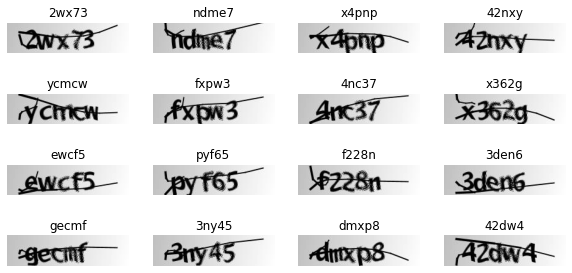

In [5]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [6]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None, **kwargs):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 50, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 200, 50, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 100, 25, 32)  0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 100, 25, 64)  18496       ['pool1[0][0]']       

In [7]:
epochs = 100
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)


Epoch 1/100
59/59 [==============================] - 19s 224ms/step - loss: 20.5070 - val_loss: 16.3841
Epoch 2/100
59/59 [==============================] - 11s 190ms/step - loss: 16.3593 - val_loss: 16.3373
Epoch 3/100
59/59 [==============================] - 11s 190ms/step - loss: 16.3489 - val_loss: 16.3350
Epoch 4/100
59/59 [==============================] - 11s 183ms/step - loss: 16.3365 - val_loss: 16.3298
Epoch 5/100
59/59 [==============================] - 12s 200ms/step - loss: 16.3286 - val_loss: 16.3172
Epoch 6/100
59/59 [==============================] - 11s 187ms/step - loss: 16.3157 - val_loss: 16.2999
Epoch 7/100
59/59 [==============================] - 12s 199ms/step - loss: 16.3029 - val_loss: 16.2634
Epoch 8/100
59/59 [==============================] - 12s 202ms/step - loss: 16.2809 - val_loss: 16.2481
Epoch 9/100
59/59 [==============================] - 11s 185ms/step - loss: 16.2423 - val_loss: 16.1816
Epoch 10/100
59/59 [==============================] - 11s 194ms/

Epoch 80/100
59/59 [==============================] - 11s 194ms/step - loss: 1.4067 - val_loss: 4.3133
Epoch 81/100
59/59 [==============================] - 11s 195ms/step - loss: 1.2942 - val_loss: 4.4884
Epoch 82/100
59/59 [==============================] - 12s 195ms/step - loss: 1.2623 - val_loss: 4.3405
Epoch 83/100
59/59 [==============================] - 12s 195ms/step - loss: 1.2691 - val_loss: 4.4271
Epoch 84/100
59/59 [==============================] - 12s 196ms/step - loss: 1.2756 - val_loss: 4.1826
Epoch 85/100
59/59 [==============================] - 11s 194ms/step - loss: 1.1522 - val_loss: 4.3064
Epoch 86/100
59/59 [==============================] - 12s 195ms/step - loss: 1.1572 - val_loss: 4.1995
Epoch 87/100
59/59 [==============================] - 13s 223ms/step - loss: 1.0653 - val_loss: 4.1273


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 200, 50, 32)       320       
                                                                 
 pool1 (MaxPooling2D)        (None, 100, 25, 32)       0         
                                                                 
 Conv2 (Conv2D)              (None, 100, 25, 64)       18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 50, 12, 64)        0         
                                                                 
 reshape (Reshape)           (None, 50, 768)           0         
                                                                 
 dense1 (Dense)              (None, 50, 64)            49216 

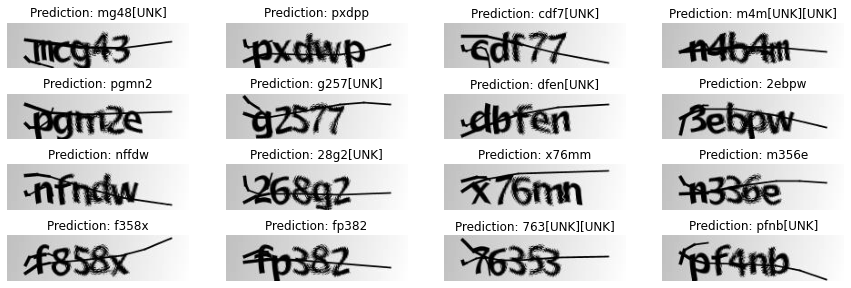

In [8]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [ ]:
model.save('my_model.h5')

In [7]:
newModel = tf.keras.models.load_model("my_model.h5",custom_objects={'CTCLayer':CTCLayer})

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 200, 50, 32)       320       
                                                                 
 pool1 (MaxPooling2D)        (None, 100, 25, 32)       0         
                                                                 
 Conv2 (Conv2D)              (None, 100, 25, 64)       18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 50, 12, 64)        0         
                                                                 
 reshape (Reshape)           (None, 50, 768)           0         
                                                                 
 dense1 (Dense)              (None, 50, 64)            49216 

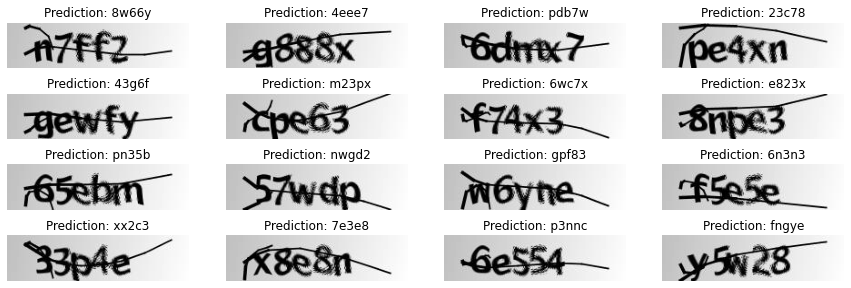

In [8]:
prediction_model = keras.models.Model(
    newModel.get_layer(name="image").input, newModel.get_layer(name="dense2").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()